In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/kid_readout/kid_readout/roach/heterodyne.pyc'>

In [3]:
import kid_readout.utils.sweeps

In [4]:
512e6/2**16

7812.5

In [5]:
78125/1e6

0.078125

In [6]:
1/_

12.8

In [7]:
1e6/128.

7812.5

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [5]:
ri.set_fft_gain(4)

In [6]:
ri.set_modulation_output('high')

0.0

In [7]:
ri.set_lo(1230.)

In [8]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(0,128)+1230.25,offsets=np.arange(-64,64)/128.,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [9]:
ri.set_dac_atten(40)

In [10]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.1 detected mcnt overflow None 754007 0 65536 0 512 754007
2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 detected mcnt overflow None 754006 0 65536 0 976 754006
8.6 8.8 9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 18.9 19.1 19.3 19.5 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.1 27.3 detected mcnt overflow None 426370 0 65536 0 272 426370
27.5 27.7 27.9 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9 30.1 30.3 30.5 30.7 30.9 31.1 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 detected mcnt over

(-70, -40)

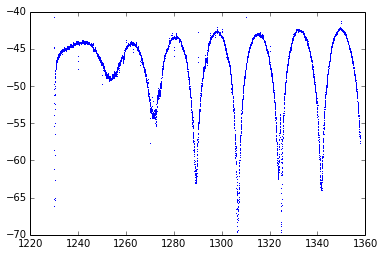

In [12]:
plot(swp.freqs,20*np.log10(np.abs(swp.data)),',')
ylim(-70,-40)
#xlim(1390,1396)

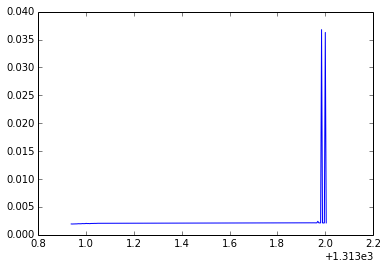

In [12]:
plot(swp.freqs[:50],np.abs(swp.data[:50]))

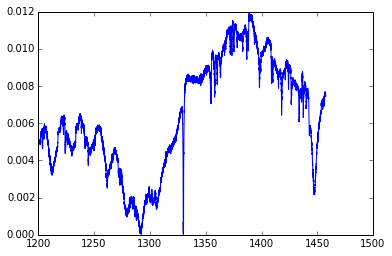

In [57]:
f2 = swp.freqs[[x for x in range(len(swp.freqs)) if x%64 not in [0,2,4,60,62]]]
d2 = swp.data[[x for x in range(len(swp.freqs)) if x%64 not in [0,2,4,60,62]]]
d2 = d2*np.exp(-31.2995j*2*np.pi*(f2-1330)+1j*np.pi)

plot(f2,np.abs(d2))
#xlim(1350,1380)

(1340, 1450)

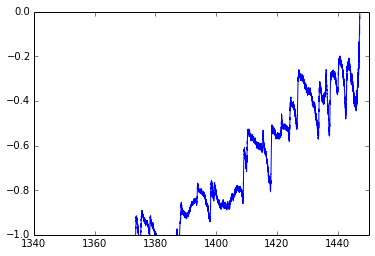

In [54]:
plot(f2,np.angle(d2))
ylim(-1,0)
xlim(1340,1450)

In [11]:
d2 = swp.data

(1220, 1250)

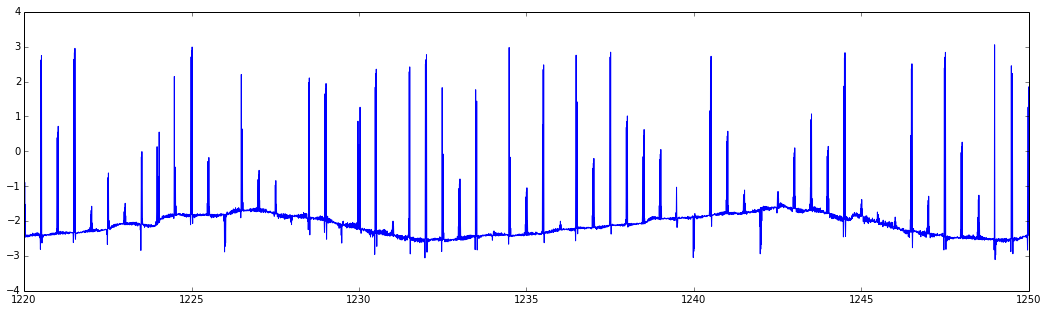

In [27]:
figure(figsize=(18,5))
d2 = swp.data
d2 = d2*np.exp(-31.3j*2*np.pi*(swp.freqs-1330))
plot(swp.freqs,np.angle(d2))
xlim(1220,1250)
#ylim(-3,0)

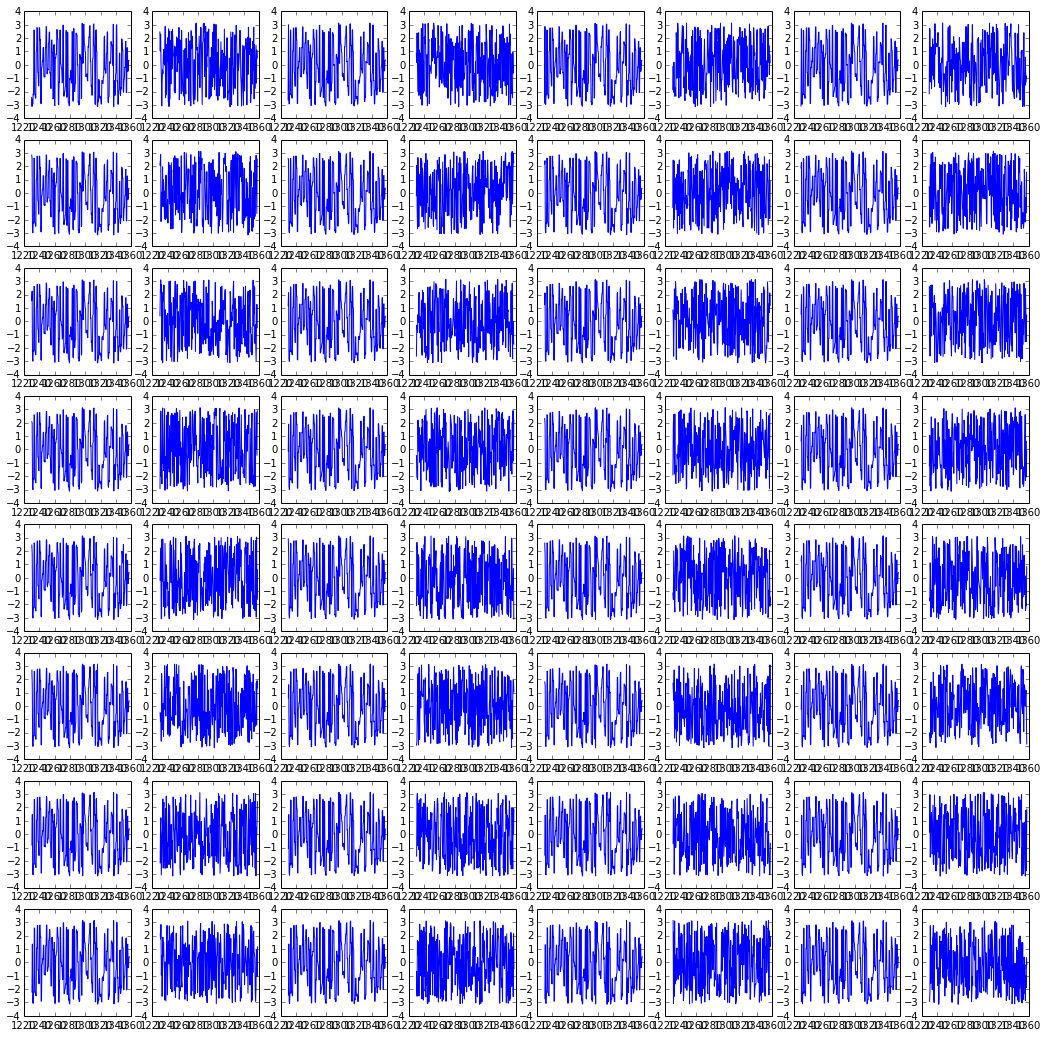

In [31]:
fig,axs = subplots(8,8,figsize=(18,18))
for k in range(64):
    ax = axs.flatten()[k]
    ax.plot(swp.freqs[k::64],np.angle(d2[k::64]))

In [13]:
ri.set_lo(1330.)

In [14]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.1 2.3 detected mcnt overflow None 360774 0 65536 0 544 360774
2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 18.9 19.1 19.3 19.5 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 detected mcnt overflow None 622963 0 65536 0 48 622963
21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.1 27.3 27.5 detected mcnt overflow None 819570 0 65536 0 432 819570
27.7 27.9 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9 30.1 30.3 30.5 30.7 30.9 31.1 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 33.8 detected mcnt 

(-55, -45)

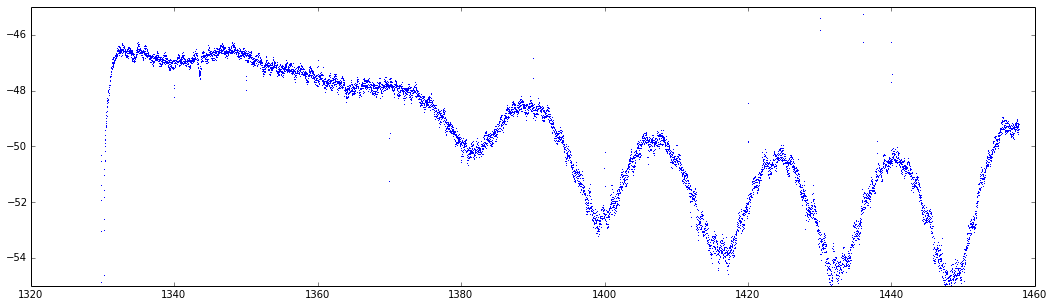

In [33]:
figure(figsize=(18,5))
d2 = swp2.data
d2 = d2*np.exp(-31.3j*2*np.pi*(swp.freqs-1140))
plot(swp2.freqs,20*np.log10(np.abs(d2)),',')
#xlim(1020,1030)
ylim(-55,-45)

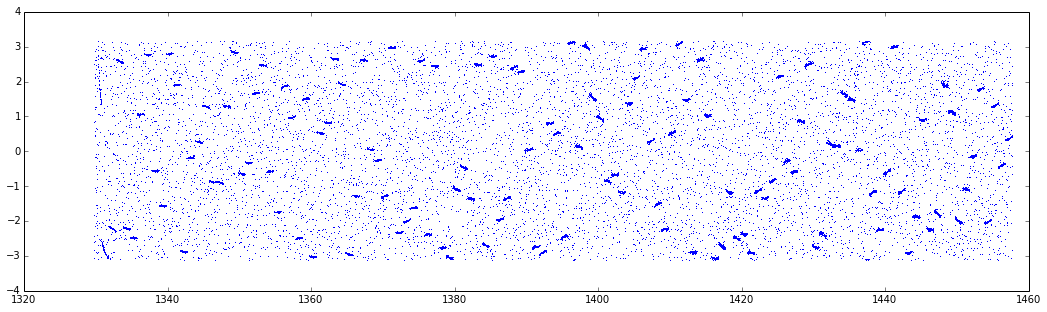

In [30]:
figure(figsize=(18,5))
d2 = swp2.data
d2 = d2*np.exp(-31.3j*2*np.pi*(swp2.freqs-1330))
plot(swp2.freqs,np.angle((d2)),',')
#xlim(1020,1030)
#ylim(-60,-40)

In [74]:
np.abs(swp2.data[126])

0.061261239631998317

In [83]:
bad = swp2.blocks[126]
good = swp2.blocks[120]

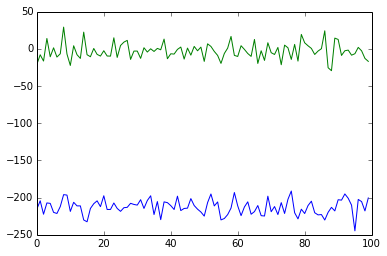

In [84]:
plot(bad.data.imag[:100])
plot(good.data.imag[:100])

In [91]:
(bad.tone*2.**14/bad.nsamp)

12303.5

In [93]:
good.fftbin

12303

In [94]:
(good.tone*2.**14/good.nsamp)

12302.0

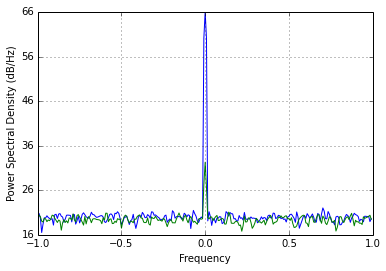

In [85]:
blah = psd(bad.data,NFFT=256)
blah = psd(swp2.blocks[1200].data,NFFT=256)


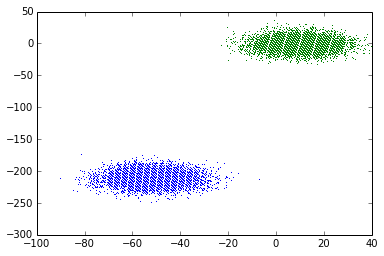

In [87]:
plot(bad.data.real,bad.data.imag,',')
plot(good.data.real,good.data.imag,',')

In [76]:
ri.tone_bins.shape

(128, 256)

In [112]:
ri.select_bank(0)

In [113]:
ri.select_fft_bins(range(32))

In [114]:
d,addr = ri.get_data(4,demod=False)

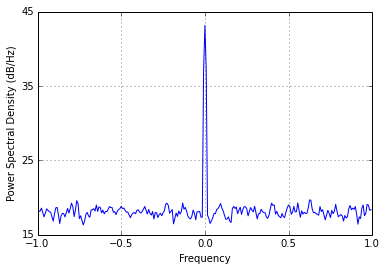

In [115]:
blah = psd(d[:,4])
#blah = psd(demod[:,12])


In [117]:
ri.nfft

16384

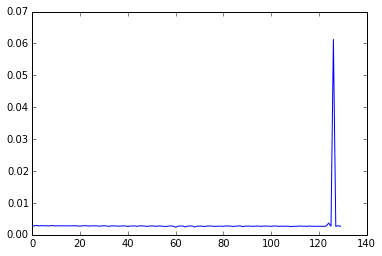

In [67]:
plot(np.abs(swp2.data[:130]))

In [25]:
ri.set_lo(1300.)
swp3 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)
d2 = swp3.data

detected mcnt overflow None 688443 0 65536 0 400 688443
detected mcnt overflow None 688413 0 65536 0 320 688413
detected mcnt overflow None 295294 0 65536 0 432 295294
detected mcnt overflow None 819552 0 65536 0 496 819552
detected mcnt overflow None 819521 0 65536 0 368 819521
detected mcnt overflow None 295203 0 65536 0 336 295203
detected mcnt overflow None 1016083 0 65536 0 1008 1016083
detected mcnt overflow None 688388 0 65536 0 336 688388
detected mcnt overflow None 950644 0 65536 0 1008 950644
detected mcnt overflow None 33125 0 65536 0 16 33125
detected mcnt overflow None 491862 0 65536 0 704 491862
detected mcnt overflow None 885047 0 65536 0 288 885047
detected mcnt overflow None 950568 0 65536 0 624 950568
detected mcnt overflow None 98569 0 65536 0 144 98569
detected mcnt overflow None 1016186 0 65536 0 688 1016186


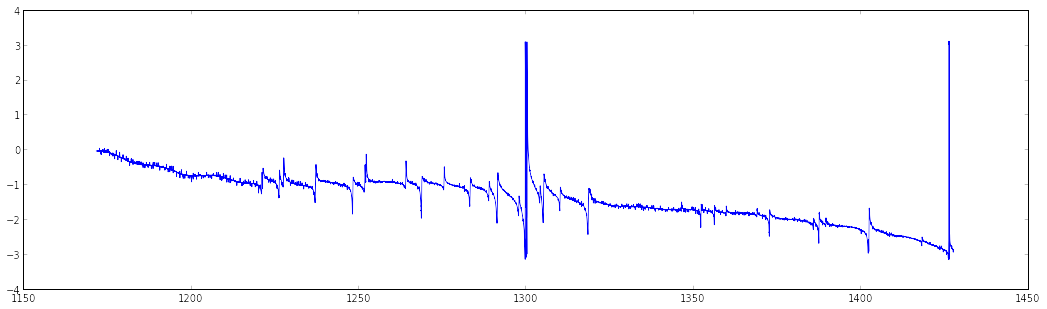

In [28]:
figure(figsize=(18,5))
d2 = swp3.data
d2 = d2*np.exp(-31.3j*2*np.pi*(swp.freqs-1140)+2j)
plot(swp3.freqs,np.angle(d2))

In [29]:
ri.set_lo(1330.)
swp4 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)
d2 = swp4.data

detected mcnt overflow None 754011 0 65536 0 512 754011
detected mcnt overflow None 819532 0 65536 0 64 819532
detected mcnt overflow None 688445 0 65536 0 608 688445
detected mcnt overflow None 1016094 0 65536 0 528 1016094
detected mcnt overflow None 33152 0 65536 0 352 33152
detected mcnt overflow None 295280 0 65536 0 832 295280
detected mcnt overflow None 1016146 0 65536 0 16 1016146
detected mcnt overflow None 1016130 0 65536 0 544 1016130
detected mcnt overflow None 688420 0 65536 0 320 688420
detected mcnt overflow None 426260 0 65536 0 800 426260
detected mcnt overflow None 164103 0 65536 0 304 164103
detected mcnt overflow None 164216 0 65536 0 848 164216
detected mcnt overflow None 950617 0 65536 0 208 950617
detected mcnt overflow None 622922 0 65536 0 448 622922
detected mcnt overflow None 1016122 0 65536 0 928 1016122


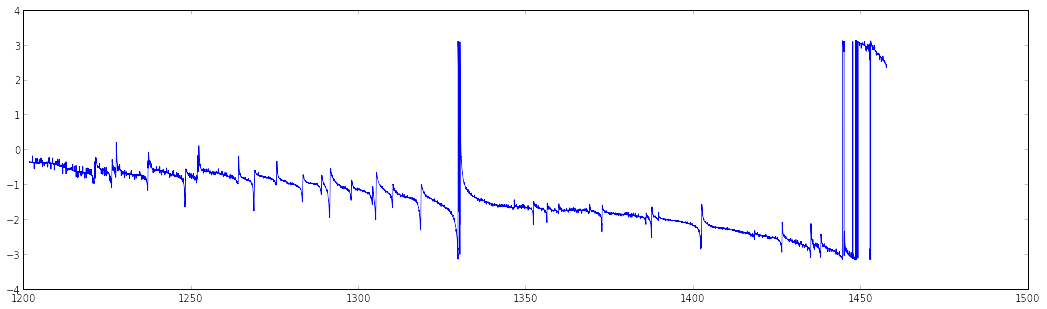

In [30]:
figure(figsize=(18,5))
d2 = swp4.data
d2 = d2*np.exp(-31.3j*2*np.pi*(swp.freqs-1330)+2j)
plot(swp4.freqs,np.angle(d2))

(-40, -20)

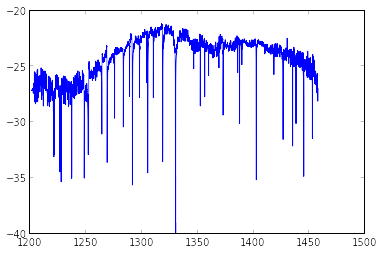

In [33]:
plot(swp4.freqs,20*np.log10(np.abs(swp4.data)))
ylim(-40,-20)

In [31]:
ri.set_lo(1530.)
swp5 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)
d2 = swp5.data

detected mcnt overflow None 557387 0 65536 0 48 557387
detected mcnt overflow None 950587 0 65536 0 656 950587
detected mcnt overflow None 295197 0 65536 0 704 295197
detected mcnt overflow None 229646 0 65536 0 16 229646
detected mcnt overflow None 754046 0 65536 0 912 754046
detected mcnt overflow None 98671 0 65536 0 288 98671
detected mcnt overflow None 98656 0 65536 0 624 98656
detected mcnt overflow None 753970 0 65536 0 528 753970
detected mcnt overflow None 819475 0 65536 0 256 819475
detected mcnt overflow None 884996 0 65536 0 912 884996
detected mcnt overflow None 819557 0 65536 0 544 819557
detected mcnt overflow None 491862 0 65536 0 784 491862
detected mcnt overflow None 360759 0 65536 0 336 360759
detected mcnt overflow None 885032 0 65536 0 896 885032
detected mcnt overflow None 950649 0 65536 0 128 950649
detected mcnt overflow None 622954 0 65536 0 400 622954
detected mcnt overflow None 98650 0 65536 0 720 98650


AttributeError: SweepData instance has no attribute 'dat'

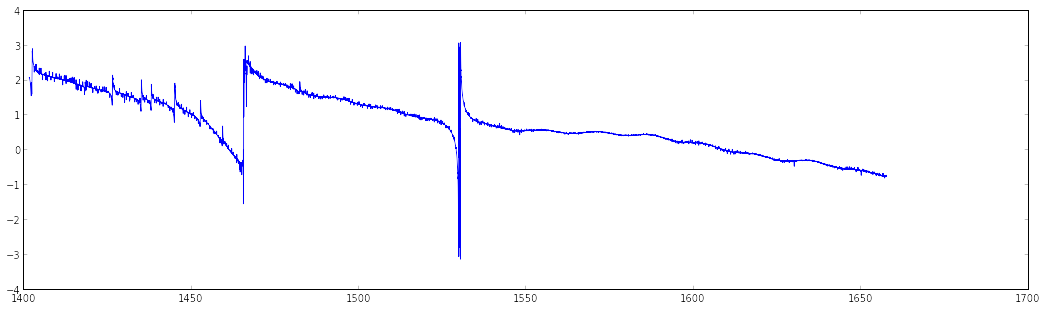

In [35]:
figure(figsize=(18,5))
d2 = swp5.data
d2 = d2*np.exp(-31.3j*2*np.pi*(swp.freqs-1530)+1j)
plot(swp5.freqs,np.angle(d2))

(-50, -15)

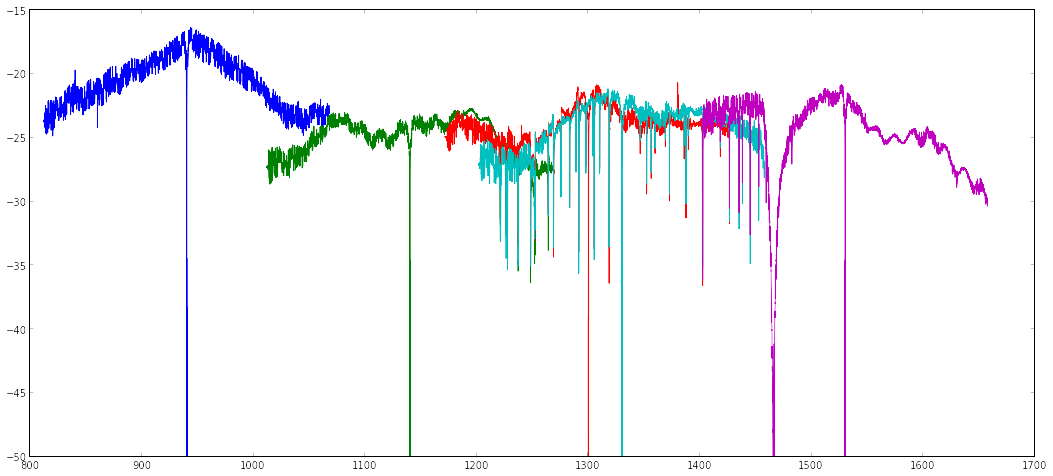

In [38]:
figure(figsize=(18,8))
for s in [swp,swp2,swp3,swp4,swp5]:
    plot(s.freqs,20*np.log10(np.abs(s.data)))
ylim(-50,-15)

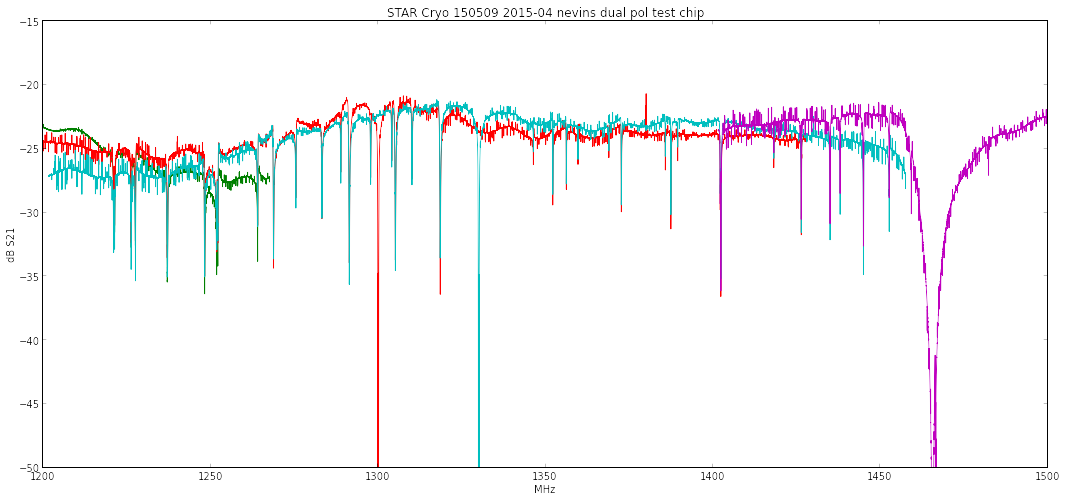

In [40]:
figure(figsize=(18,8))
for s in [swp,swp2,swp3,swp4,swp5]:
    plot(s.freqs,20*np.log10(np.abs(s.data)))
ylim(-50,-15)
xlim(1200,1500)
title('STAR Cryo 150509 2015-04 nevins dual pol test chip')
xlabel('MHz')
ylabel('dB S21')

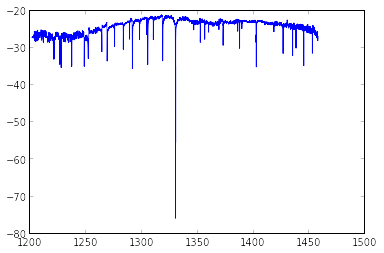

In [45]:
plot(swp4.freqs,20*np.log10(np.abs(swp4.data)))

In [46]:
swp4.lo

array([ 1330.,  1330.,  1330., ...,  1330.,  1330.,  1330.])

In [48]:
np.savez('/home/gjones/2015-07-01-starcryo-nevins-initial-sweep.npz',freq=swp4.freqs,lo=1330,data=swp4.data)

In [49]:
import kid_readout.analysis.noise_measurement

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [ ]:
kid_readout.analysis.noise_measurement.save_noise_pkl('/data/detectors/pkl/2015-07-01-star-cryo-150509-nevins-2015-04-initial-sweeps.pkl',[swp,swp2,swp3,swp4,swp5])

In [ ]:
2

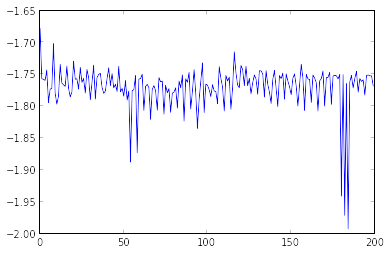

In [58]:
plot(np.angle(d2[:200]))

(-50, -30)

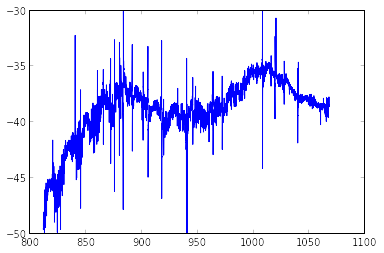

In [52]:
plot(swp.freqs,20*np.log10(abs(d2)))
ylim(-50,-30)

In [59]:
np.savez('/home/gjones/2015-06-19-initial-sweep.npz',freq=swp.freqs,lo=940,data=d2)

In [60]:
resonances = [844.95,
             865.24,
             871.9,
             875.29,
             879.67,
             880.99,
             883.09,
             891.17,
             900.9,
             905.3,
             917.6,
             919.4,
             945.5,
             947.5,
             950.4,
             963.58,
             971.77,
             992.03,
             1002.93,
             1007.93,
             1015.6,
             1019.13,
             1027.3,
             1034.36,
             1039.54,
             ]

In [61]:
len(resonances)

25

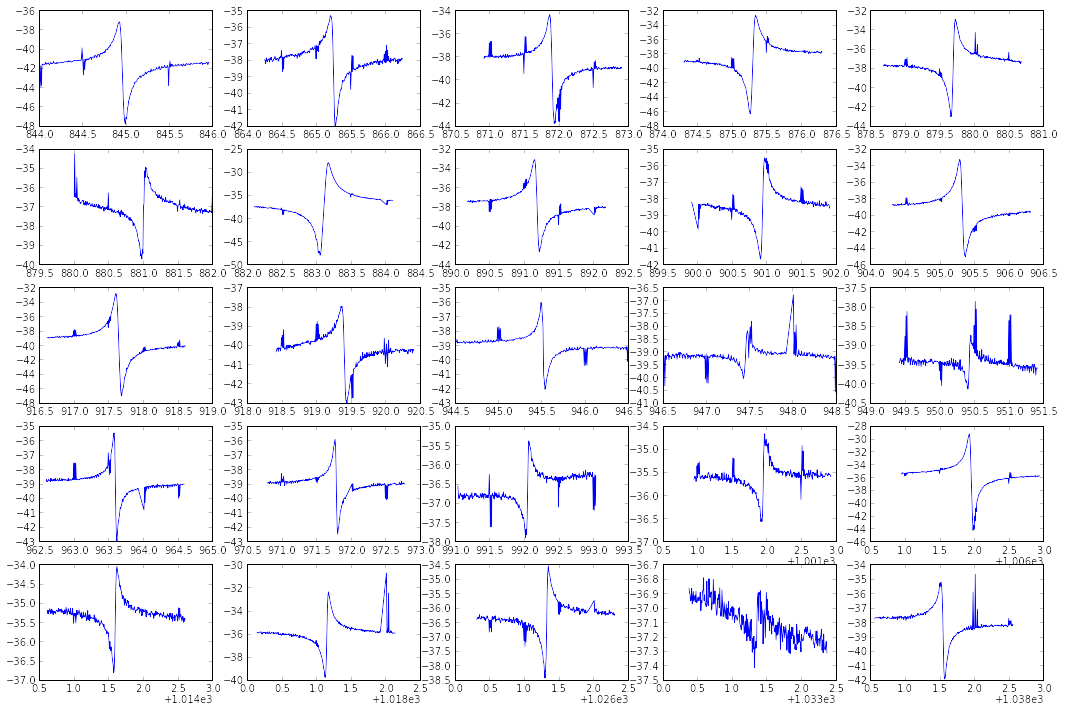

In [64]:
fig,axs = subplots(5,5,figsize=(18,12))
for k in range(25):
    ax = axs.flatten()[k]
    f0 = resonances[k]
    idx = abs(swp.freqs - f0) < 1
    ax.plot(swp.freqs[idx],20*np.log10(abs(d2[idx])))

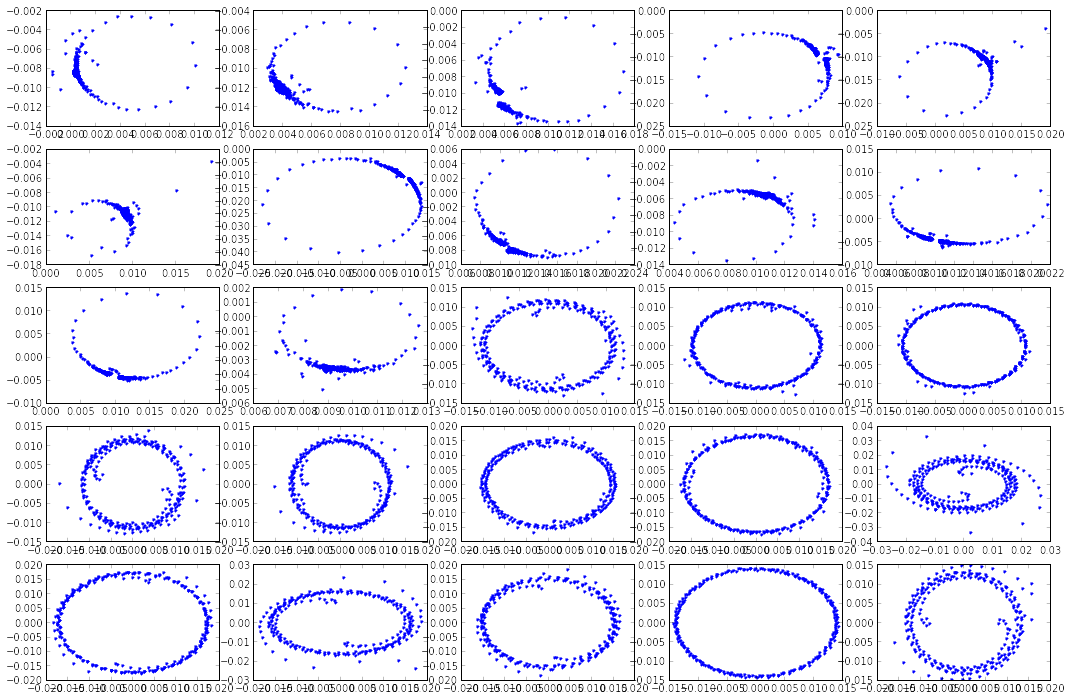

In [65]:
fig,axs = subplots(5,5,figsize=(18,12))
for k in range(25):
    ax = axs.flatten()[k]
    f0 = resonances[k]
    idx = abs(swp.freqs - f0) < 1
    ax.plot(d2[idx].real,d2[idx].imag,'.')

In [66]:
np.diff(swp.freqs)[0]

0.0078125

In [67]:
import kid_readout.analysis.resonator

845.122272927 -1057.14242467 426.50540883 -17.5545716684 716.987447398
865.255609872 -2136441.42486 86077.9743987 -379567.866406 9982633.84728
872.031127075 -1164.99517587 446.960612377 -30.6514374322 730.733313801
875.251516328 9999875.83014 0.108114045327 420688.943431 9999814.74346
879.649710495 10000014.2084 0.0707624283613 621063.019476 9999995.86283
879.500633073 -540.097096367 183.204462442 -79.9270419305 365.754869693
881.949905232 -3280.14979844 87.0699247688 -517.117355275 85008.4694417
891.176502951 2980363.63944 1771.82084002 -206113.798837 2650880.64199
899.8875971 -680.483507977 233.444536746 -72.1978187519 409.807667122
905.457617292 -1271.13195236 518.732922362 -78.6620259391 910.962285405
917.678303652 9999390.17656 0.454513602866 -493201.728209 9999203.35086
919.568838597 -770.627812338 334.937868216 -15.8862366455 594.78366388
945.537891886 4798333.85651 0.00585227621919 12376.3844736 4797454.35104
947.101763373 -1306265.2117 262257.081757 -325185.683469 1356569.4516

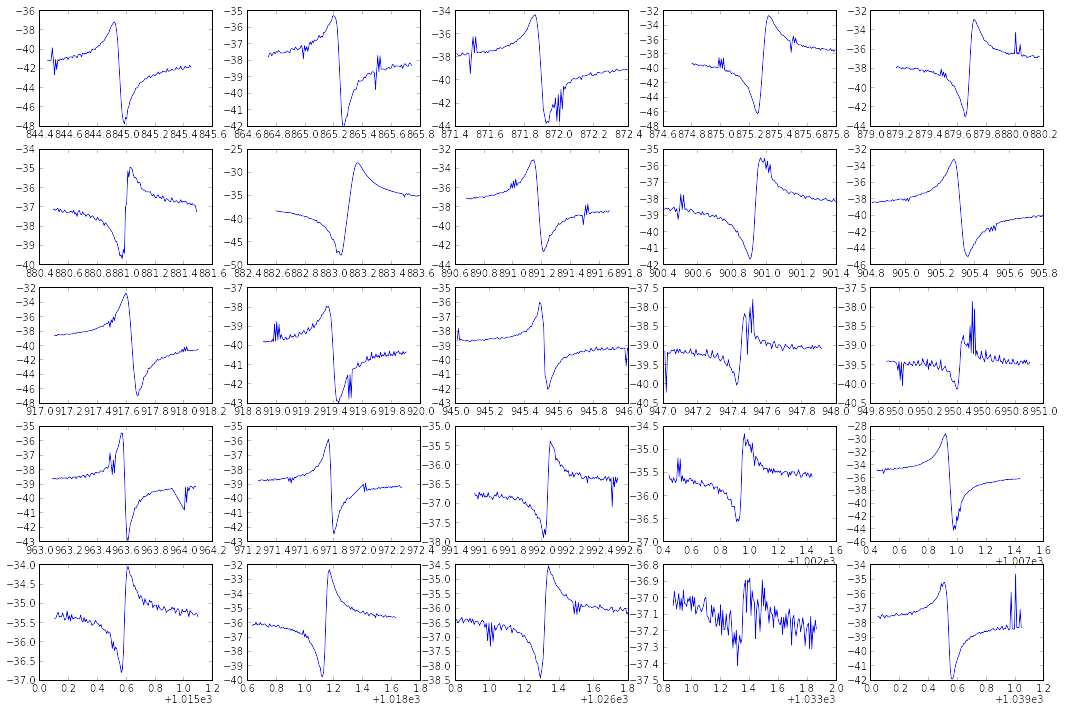

In [295]:
fig,axs = subplots(5,5,figsize=(18,12))
for k in range(25):
    ax = axs.flatten()[k]
    f0 = resonances[k]
    idx = abs(swp.freqs - f0) < .5
    res = kid_readout.analysis.resonator.fit_best_resonator(swp.freqs[idx],d2[idx],errors=swp.errors[idx],delay_estimate=0)
    ax.plot(swp.freqs[idx],20*np.log10(abs(d2[idx])))
    print res.f_0,res.Q_i,res.Q_e_real,res.Q_e_imag,res.Q
#    ax.plot(res.freq_data,20*np.log10(abs(res.model(x=res.freq_data))))

In [73]:
f2 = kid_readout.utils.sweeps.prepare_sweep(ri,np.array(resonances[:16]),offsets=np.arange(-32,32)/128.,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [220]:
ri.set_dac_atten(0)

In [301]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=16,reads_per_step=8)

detected mcnt overflow None 1278008 0 32768 0 160 1278008
detected mcnt overflow None 1998906 0 32768 0 752 1998906
detected mcnt overflow None 688187 0 32768 0 1312 688187
detected mcnt overflow None 1671229 0 32768 0 1904 1671229


(844, 846)

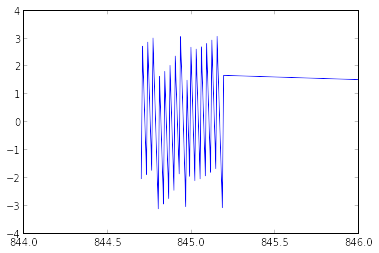

In [78]:
plot(swp2.freqs,np.angle(swp2.data))
xlim(844,846)

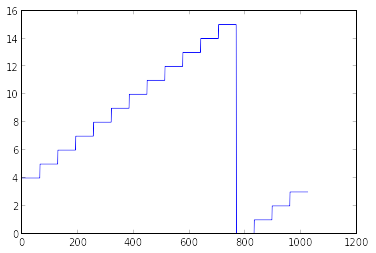

In [79]:
plot(swp2.sweep_indexes)

In [302]:
fr,d,err = swp2.select_index(6)

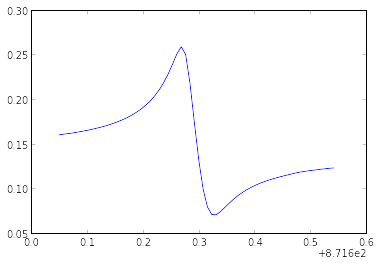

In [303]:
plot(fr,abs(d))

In [304]:
res = kid_readout.analysis.resonator.fit_best_resonator(fr,np.conj(d),errors=err,delay_estimate=-31.5)

In [305]:
res.Q_e_imag

-14002.979142873199

In [306]:
res.Q

17541.451891153192

In [307]:
res.Q_i

20598.982957555159

In [308]:
res.Q_e_real

1683.179416025471

In [316]:
Qe = res.Q_e_real+1j*res.Q_e_imag

In [320]:
1/(1/res.Q-np.abs(1/Qe))

-71967.45145292519

In [309]:
res.f_0

871.89711432840181

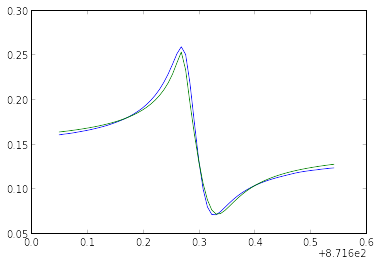

In [310]:
plot(fr,abs(d))
plot(res.freq_data,abs(res.model()))

In [245]:
swp2.blocks[0].sweep_index

4

In [312]:
blk1 = [blk for blk in swp2.blocks if blk.sweep_index==6]

In [313]:
len(blk1)

64

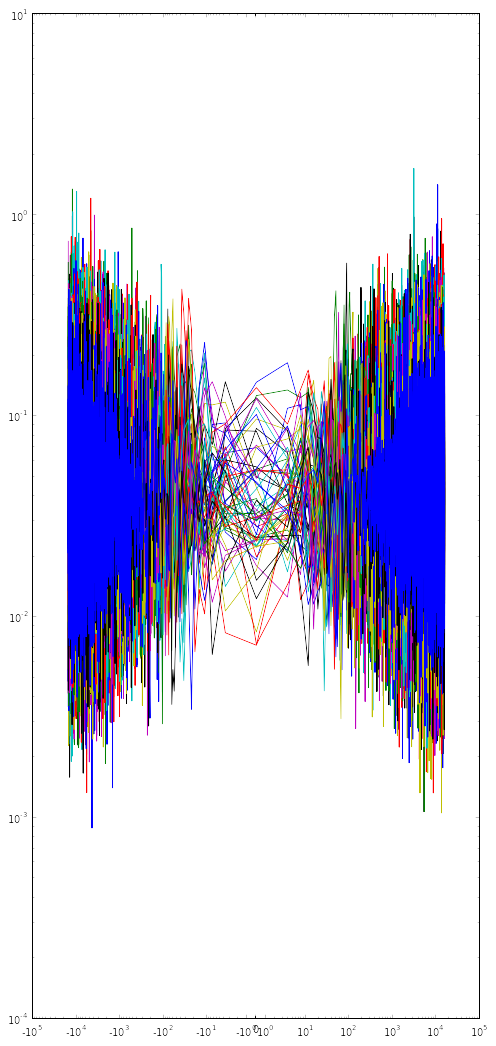

In [315]:
figure(figsize=(8,18))
for n,blk in enumerate(blk1):
    pxx,fr = mlab.psd(blk.data-blk.data.mean(),Fs=512e6/2**14,NFFT=1024*8)
    semilogy(fr,pxx)#*(n+1))
xscale('symlog')

In [271]:
blk = blk1[31]

In [281]:
pxx,fr = mlab.psd(blk.data-blk.data.mean(),Fs=512e6/2**14,NFFT=8192)

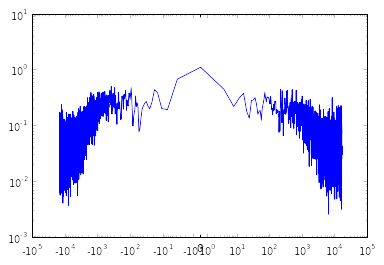

In [282]:
semilogy(fr,pxx)
xscale('symlog')

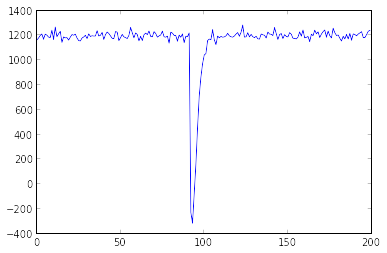

In [290]:
plot(blk.data.real[19600:19800])

In [248]:
res.a

AttributeError: 'Resonator' object has no attribute 'a'

In [ ]:
blk.data.shape

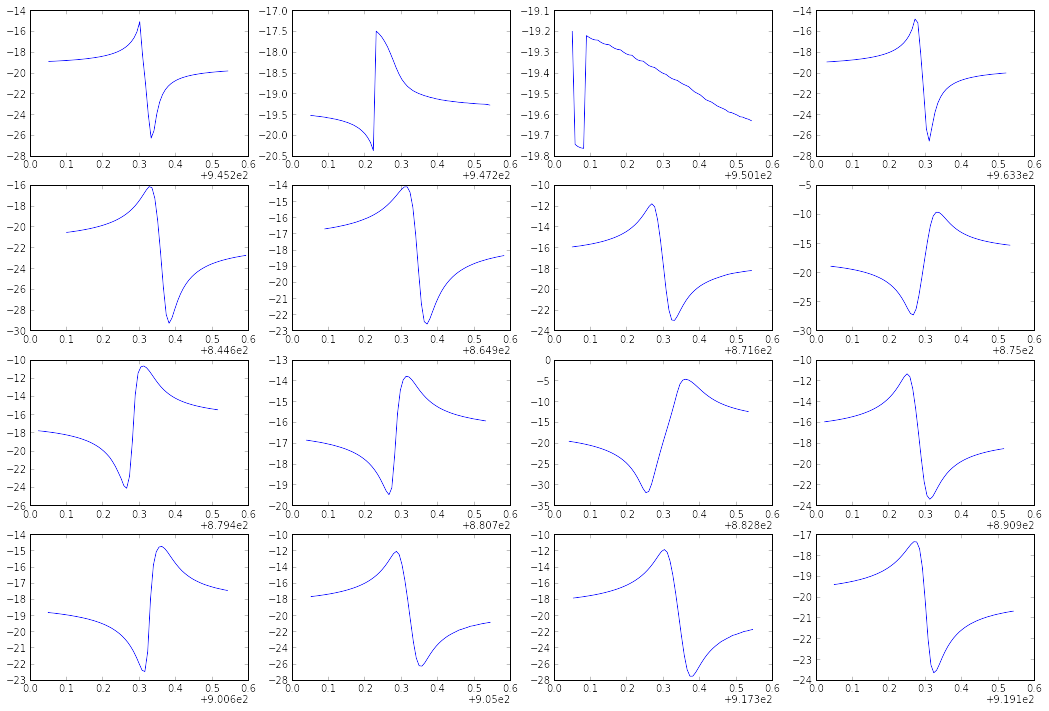

In [311]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = swp2.select_index(k)
    ax.plot(fr,20*np.log10(abs(s21)))
    #res = kid_readout.analysis.resonator.fit_best_resonator(fr,s21,errors=err,delay_estimate=31.5)
    #ax.plot(fr,20*np.log10(abs(res.model(x=fr))))


In [294]:
ri.dac_atten

0.0